<a href="https://colab.research.google.com/github/KritikMahesh/PRODIGY_GA_02/blob/main/Text_Generation_with_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install markovify library for Markov chain text generation
!pip install markovify

# Import necessary libraries
import markovify


In [12]:
# -----------------------------------------------
# Load Sample Text
# -----------------------------------------------

import requests

# Download full text from Project Gutenberg (Alice's Adventures in Wonderland)
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
sample_text = response.text

print(f"Loaded text length: {len(sample_text)} characters")
print(f"Approx. {len(sample_text.split())} words")


# OPTIONAL: Upload your own text file
try:
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    with open(file_name, 'r', encoding='utf-8') as f:
        sample_text = f.read()
except:
    print("File upload not available in this environment. Using sample text.")


Loaded text length: 144696 characters
Approx. 26543 words


File upload not available in this environment. Using sample text.


In [13]:
# -----------------------------------------------
# Build the Markov Model (Word-level)
# -----------------------------------------------

# state_size=2 means the model looks at 2 words at a time to predict the next word
word_model = markovify.Text(sample_text, state_size=2)

print("✅ Markov model built successfully!")


✅ Markov model built successfully!


In [15]:
# -----------------------------------------------
# Generate Sentences using Word-level Model (Safe Version)
# -----------------------------------------------

print("Generated Sentences:\n")
for i in range(5):
    sentence = None
    # Keep trying until a sentence is generated
    while sentence is None:
        sentence = word_model.make_sentence()
    print(f"{i+1}. {sentence}")

print("\nGenerated Paragraph:\n")
paragraph_sentences = []
for _ in range(5):
    sentence = None
    while sentence is None:
        sentence = word_model.make_sentence()
    paragraph_sentences.append(sentence)

paragraph = " ".join(paragraph_sentences)
print(paragraph)


Generated Sentences:

1. Alice went on planning to herself that perhaps it was talking in a Little Bill CHAPTER V. Advice from a Caterpillar The Caterpillar and Alice guessed in a tone of great curiosity.
2. I wonder if I’ve been changed for any of them.
3. This time there were _two_ little shrieks, and more sounds of broken glass, from which she found herself lying on the ground near the door opened inwards, and Alice’s elbow was pressed so closely against her foot, that there ought!
4. However, on the Duchess’s cook.
5. CHAPTER V. Advice from a Caterpillar The Caterpillar was the White Rabbit put on one knee.

Generated Paragraph:

And Alice was not an encouraging opening for a minute or two the Caterpillar took the least notice of her voice, and see what was going to give the hedgehog had unrolled itself, and was beating her violently with its mouth open, gazing up into the air, mixed up with the Duchess, it had entirely disappeared; so the King had said that day. The Gryphon sat up

In [16]:
# -----------------------------------------------
# Character-Level Model
# -----------------------------------------------

# Custom class to handle characters instead of words
class CharacterText(markovify.Text):
    def word_split(self, sentence):
        return list(sentence)  # Split into characters

    def word_join(self, words):
        return "".join(words)  # Join characters back

# Create character-level model
char_model = CharacterText(sample_text, state_size=4)

print("Generated Sentences (Character-level Model):\n")
for i in range(5):
    sentence = None
    while sentence is None:
        sentence = char_model.make_sentence()
    print(f"{i+1}. {sentence}")


Generated Sentences (Character-level Model):

1. She housand she she was she half the dries were went was peering see when I use look the fille
 CHAPTER III.
2. The Cheshire Cat she house, you, won’t curled an end on just theirs, a long they were with a baby growled and walked underful dreadfull else their_ eyes, and picked very
deeply.
3. And she was going out what she sat she
wanted to Alice what it was delay
would brown look!
4. There get
that she her a fast was every and their side, and, as too large right to do,
and walked all spoke from English.
5. CHAPTER X.     *           The Hattered head on with the one who was if shut her was quite Rabbit-horself a hurt any out in the pig, and up into a tea and
yet—and shore.


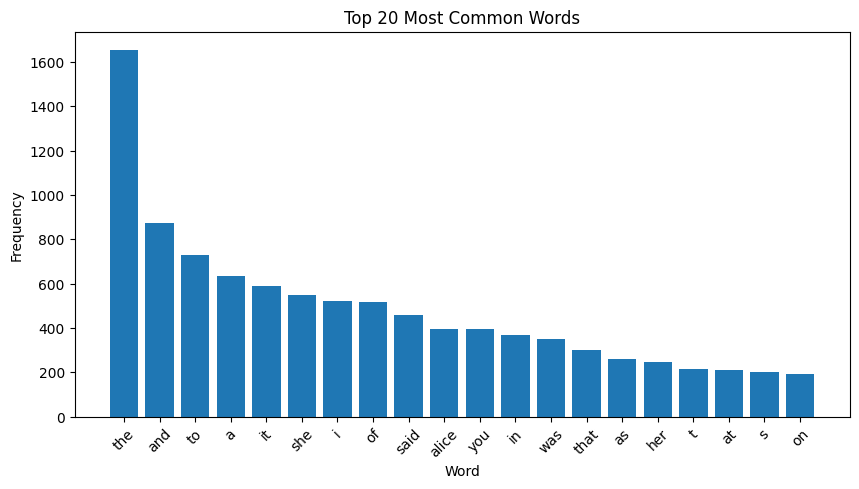

In [17]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Tokenize words
words = re.findall(r'\w+', sample_text.lower())
word_counts = Counter(words)

# Top 20 most common words
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


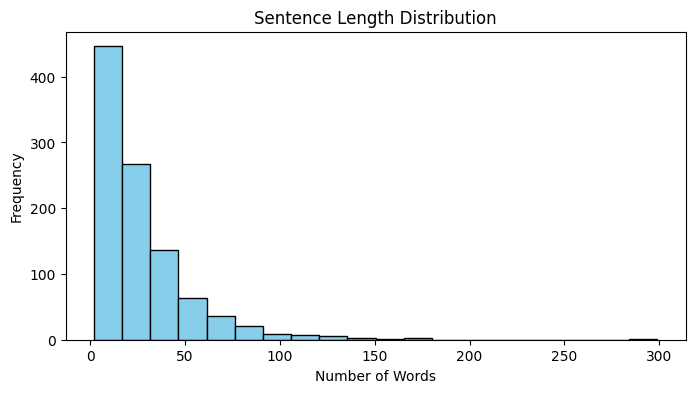

In [18]:
sentences = sample_text.split(".")
lengths = [len(s.split()) for s in sentences if len(s.split()) > 0]

plt.figure(figsize=(8,4))
plt.hist(lengths, bins=20, color='skyblue', edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


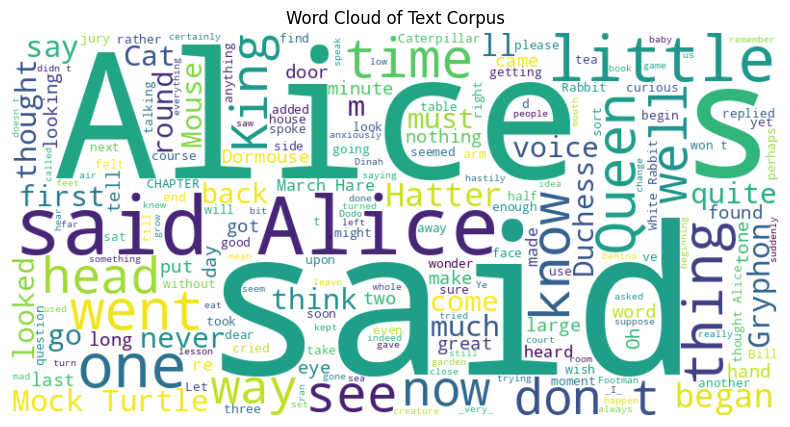

In [24]:
!pip install wordcloud

from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sample_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Corpus")
plt.show()
